---
<a id='top'></a>

# Example usage

To use `unox` in a project:

In [1]:
import unox
print(unox.__version__)

0.1.0


## Table of Contents

- [Before you start](#before_you_start)
- [Exploring a dataset](#exploring_a_dataset)
- [Plotting results](#plotting_results)

---
<a id='before_you_start'></a>
[back to top](#top)

## Before you start

To be filled in later.

In [2]:
import os
os.getcwd()

'/Users/Grey/Documents/Research/Postdoc_Projects/unox/docs'

---
<a id='exploring_a_dataset'></a>
[back to top](#top)

## Exploring a dataset

This section shows examples of plotting functions which can be used to explore a dataset. First we import the required modules.

In [3]:
import xarray as xr
import unox.plotting as uplt

Next, we load an example dataset.

In [4]:
nox = xr.open_dataset('../datafiles/nox_2019_t106_US.nc')
nox

<xarray.Dataset> Size: 3MB
Dimensions:  (lon: 60, lat: 32, time: 365)
Coordinates:
  * lon      (lon) float64 480B -126.0 -124.9 -123.8 ... -61.88 -60.75 -59.62
  * lat      (lat) float64 256B 24.11 25.23 26.36 27.48 ... 56.63 57.76 58.88
  * time     (time) datetime64[ns] 3kB 2019-01-01 2019-01-02 ... 2019-12-31
Data variables:
    nox      (time, lat, lon) float32 3MB ...

Next, we can visualize the extent of this dataset by plotting a bounding box on a world map.

/Users/Grey/miniconda3/envs/unox1/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:403: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "


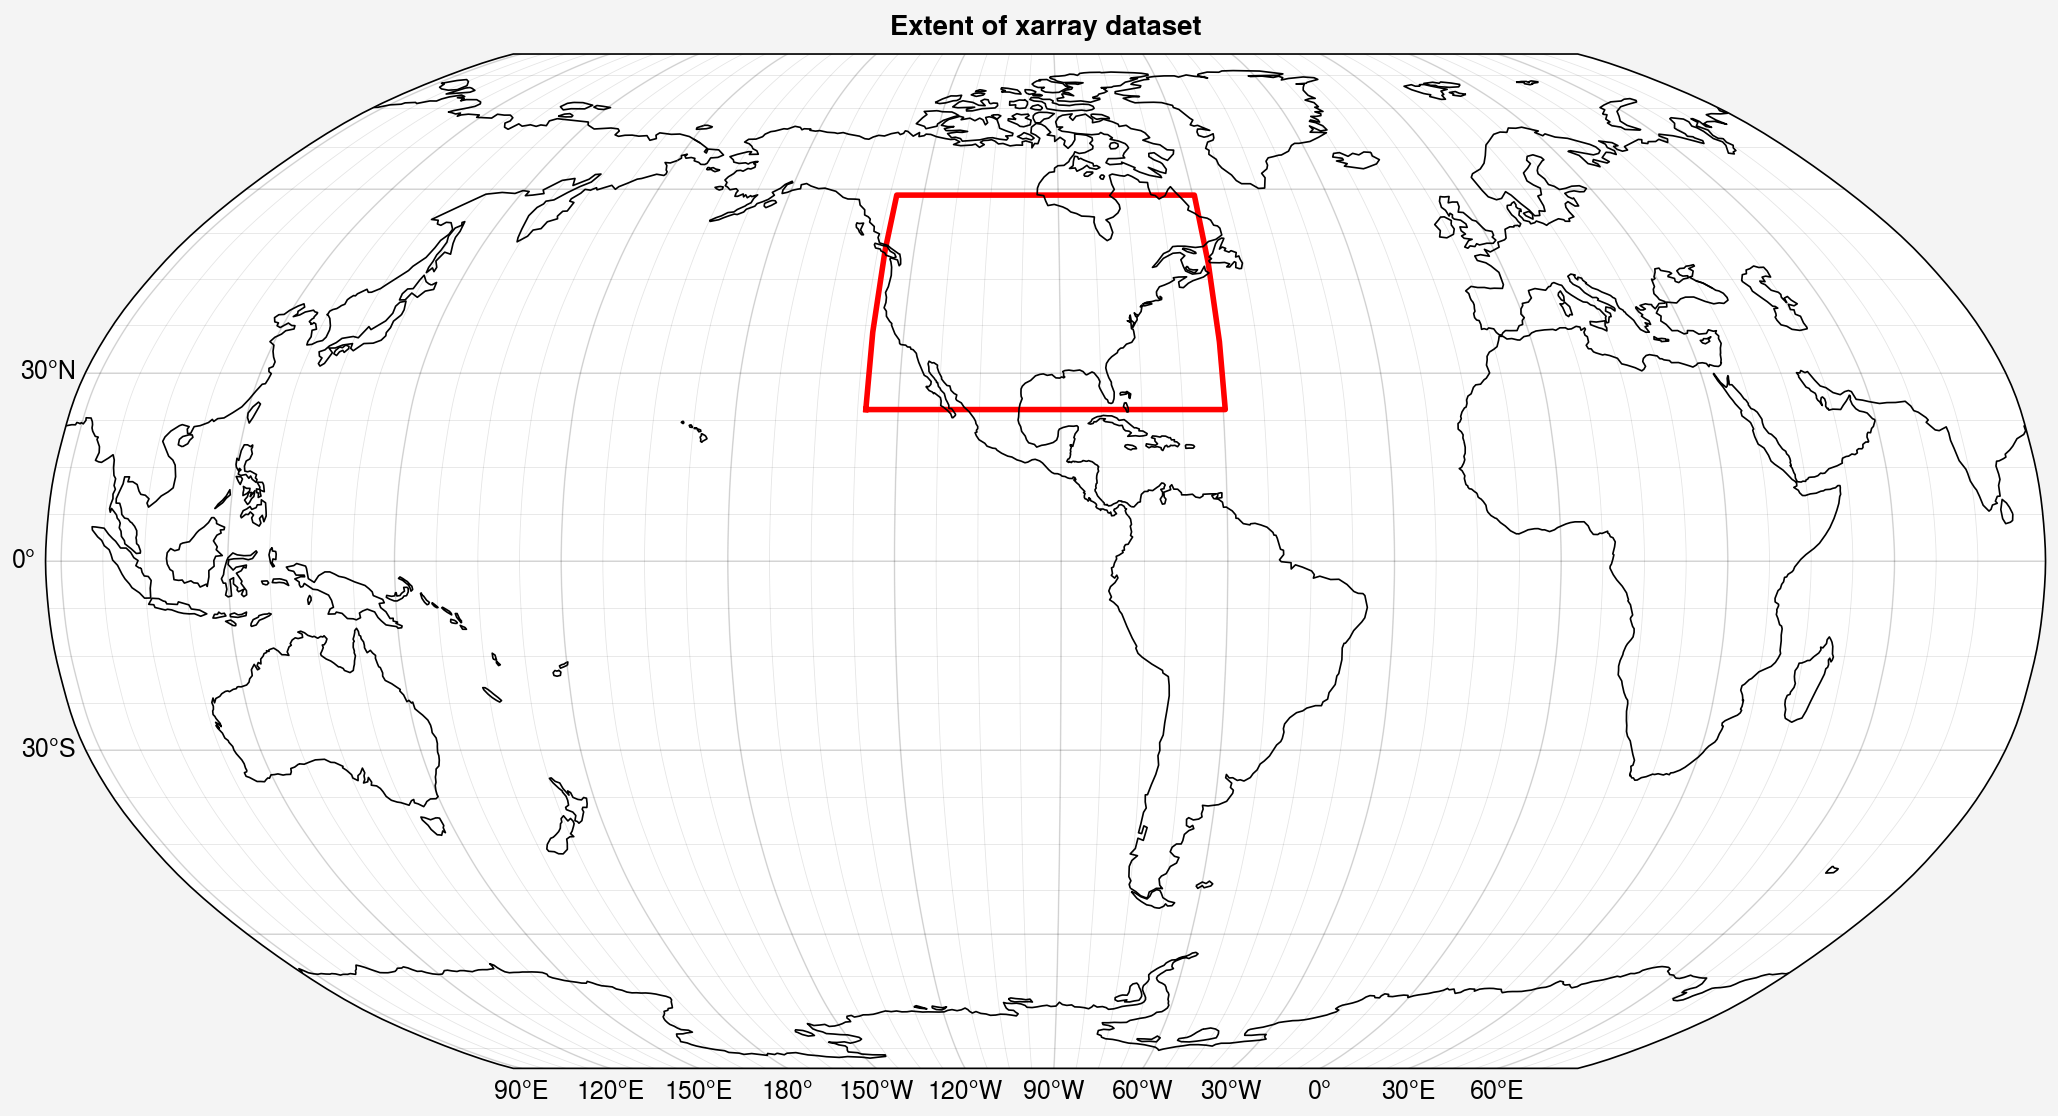

In [5]:
extent_plot = uplt.plot_extent(nox)

Then, we can make a plot which shows a checkered pattern to visualize the resolution in latitude and longitude.

/Users/Grey/miniconda3/envs/unox1/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:403: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "


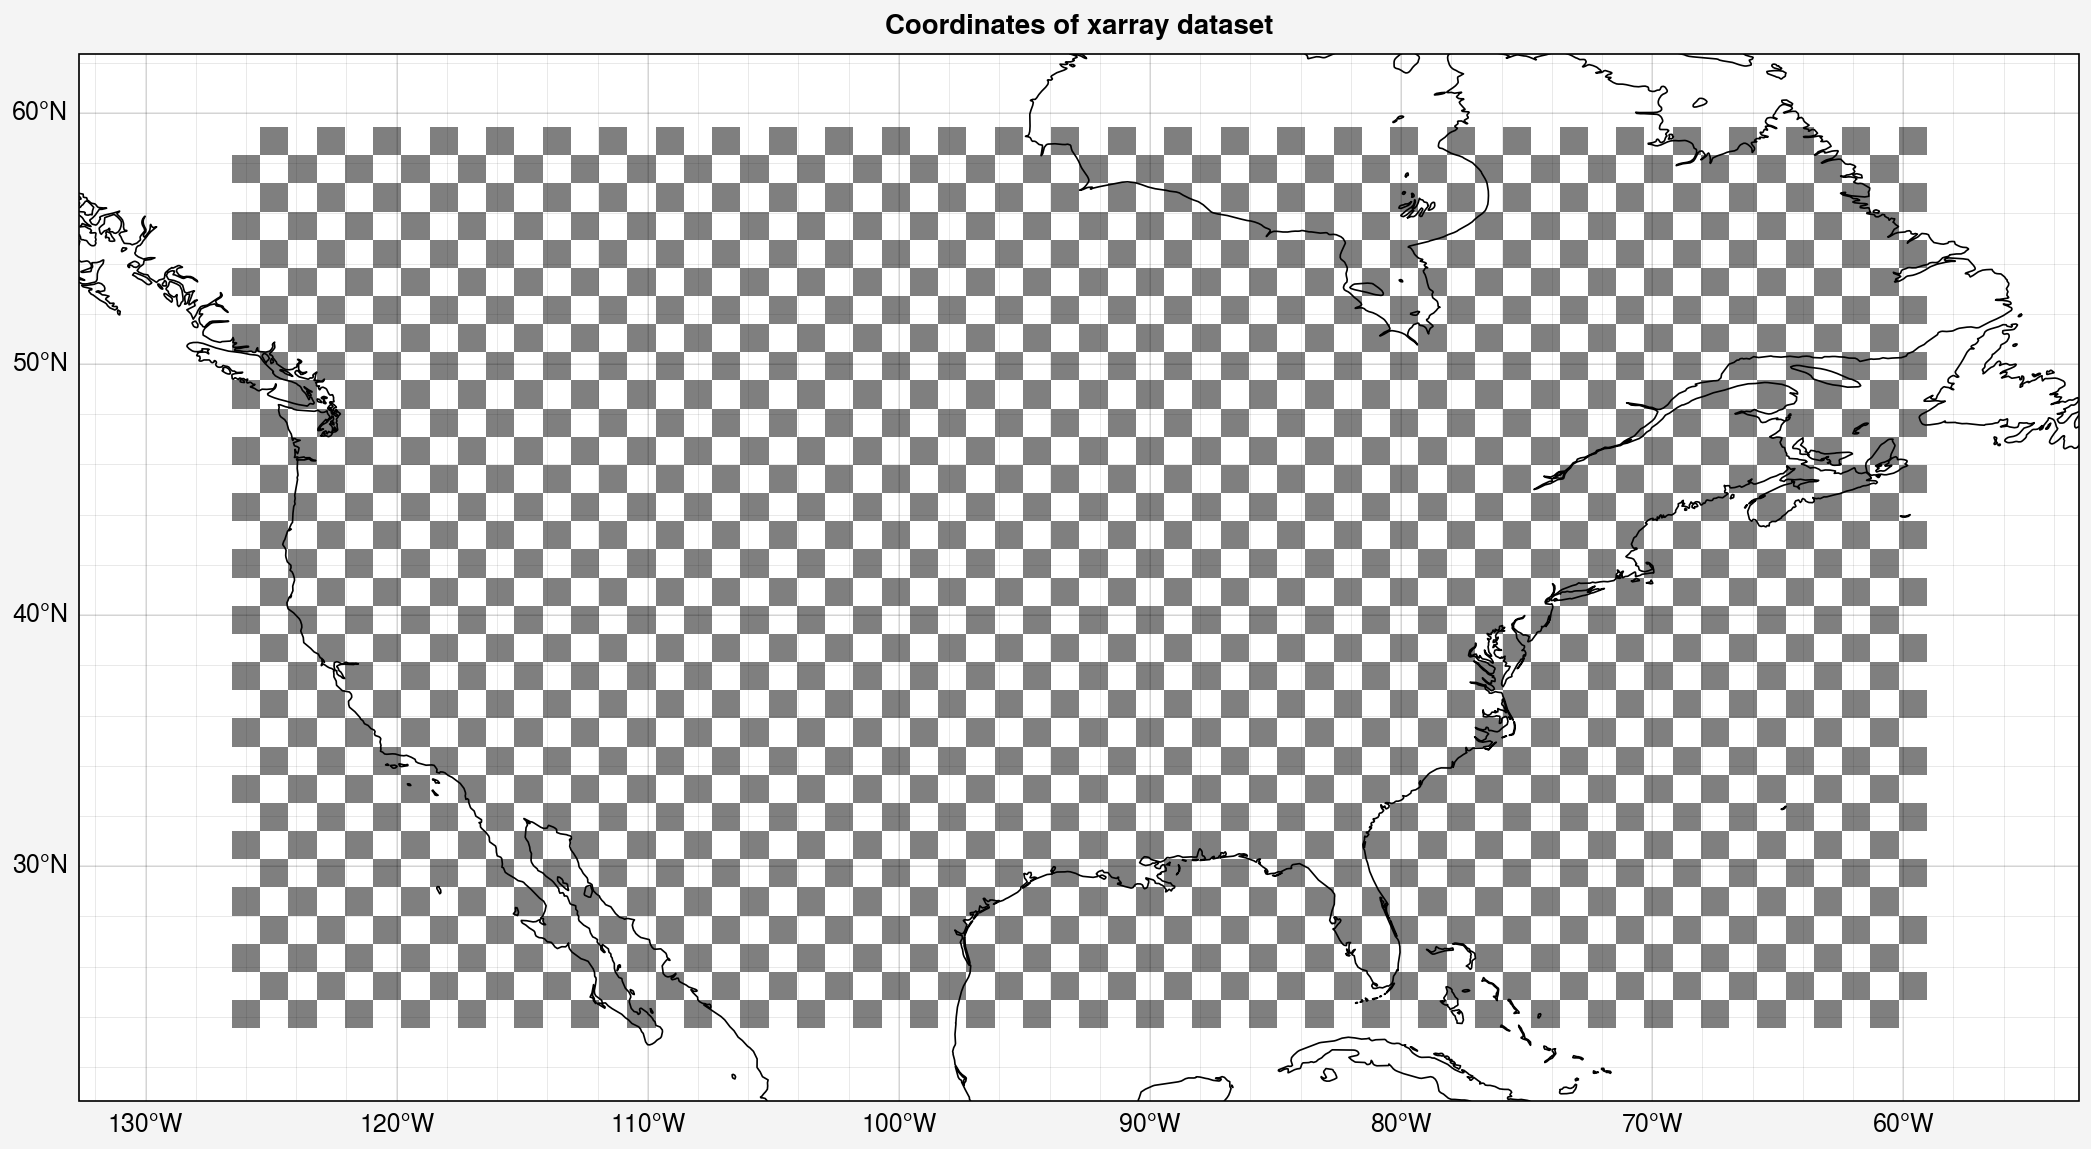

In [6]:
lats_lons_plot = uplt.plot_lats_lons(nox)

Finally, we can visualize the NOx data it contains. Here, we arbitrarily select January 1st, 2019.

/Users/Grey/miniconda3/envs/unox1/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:403: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "


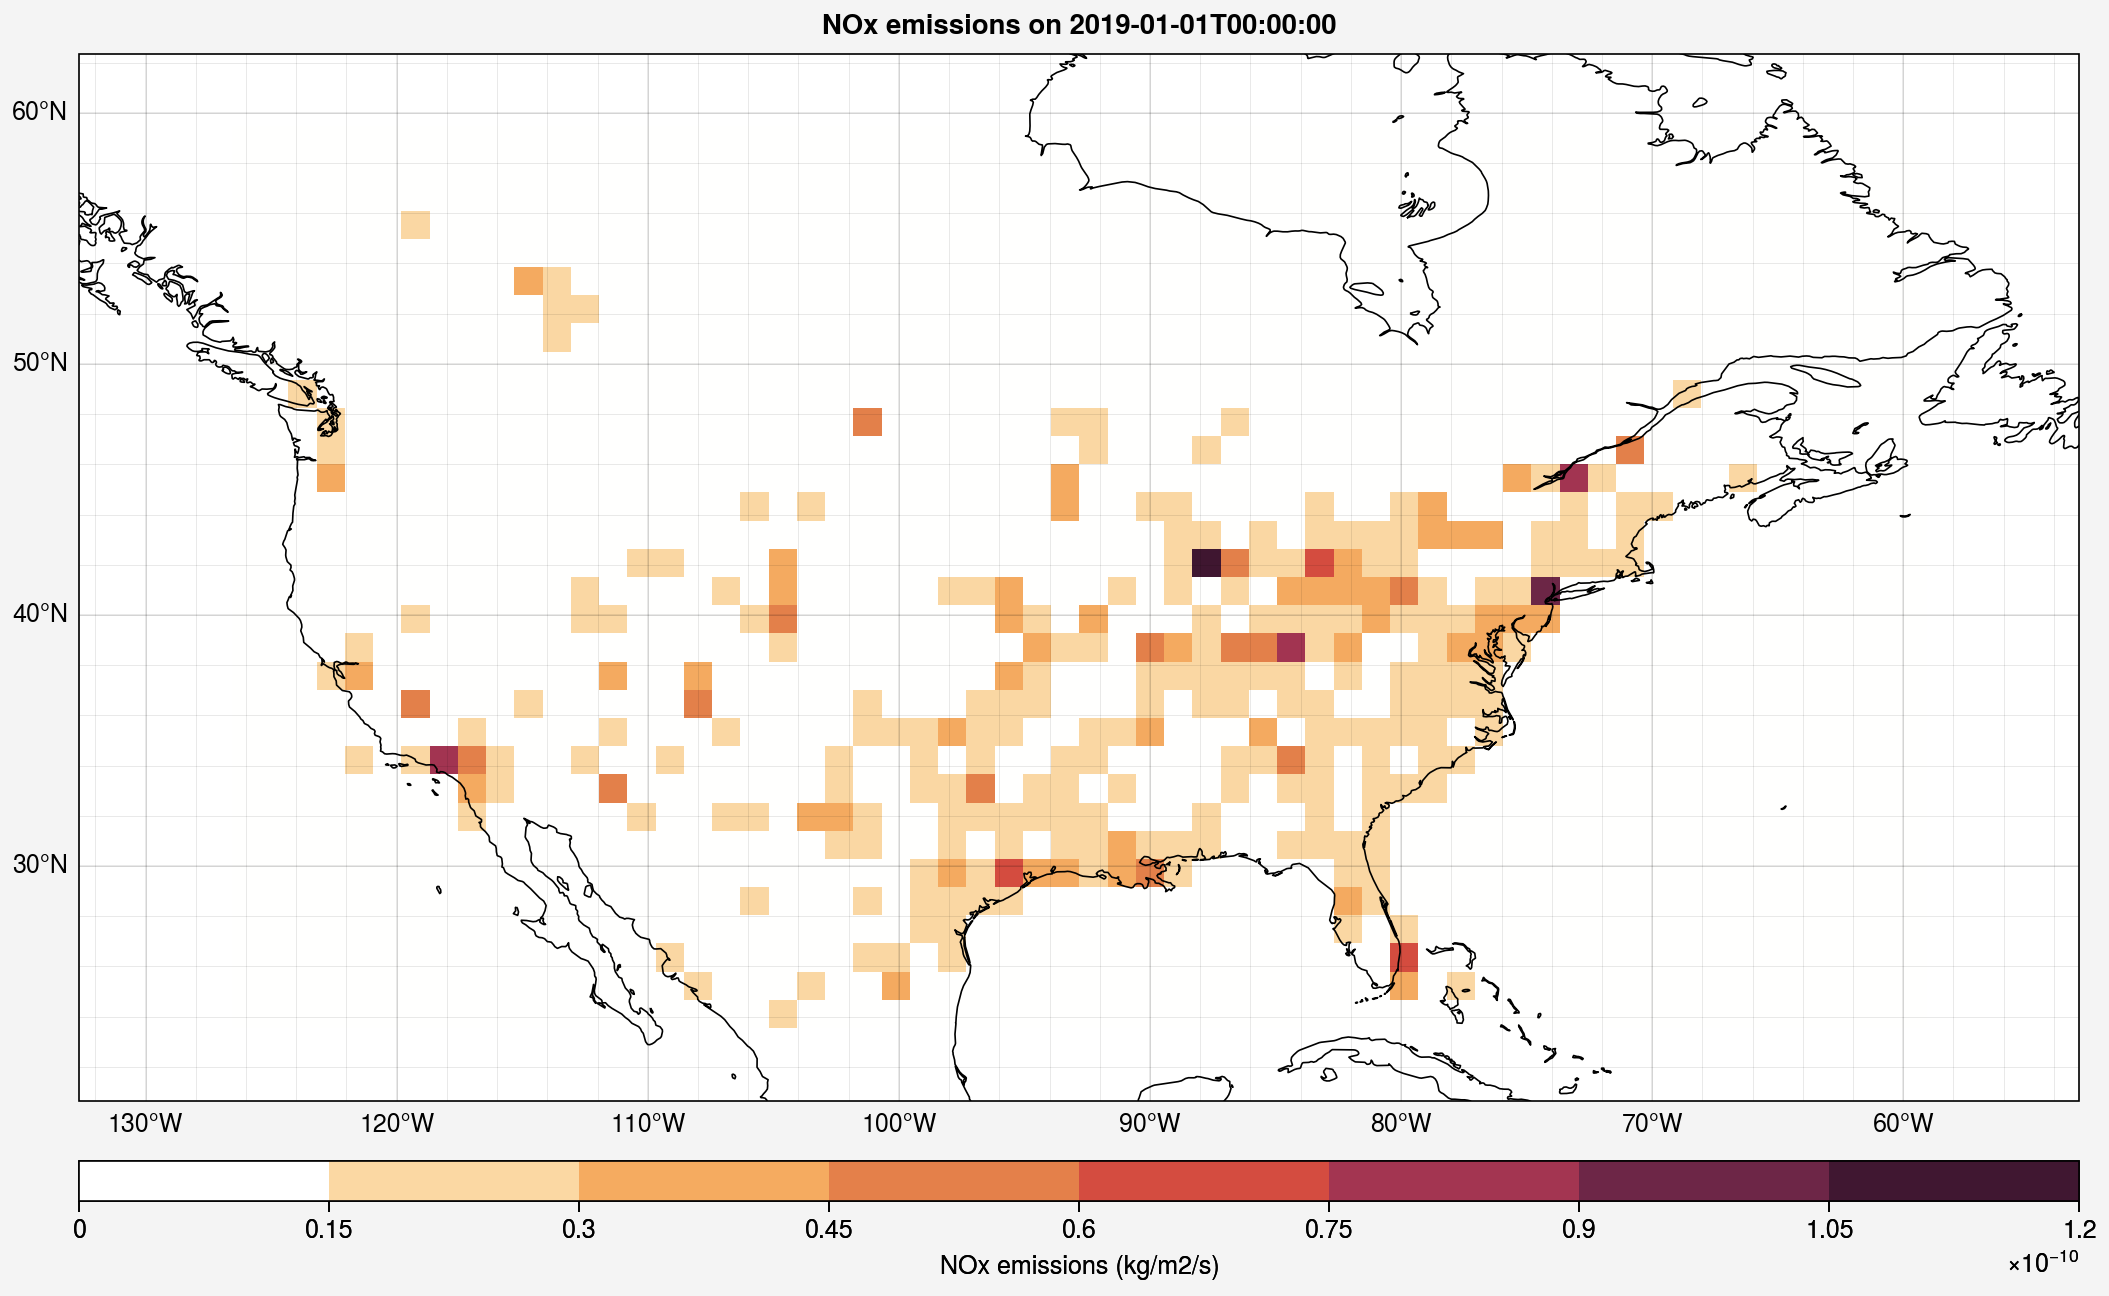

In [7]:
nox_plot = uplt.plot_nc_map(
        datafile='../datafiles/nox_2019_t106_US.nc',
        var='nox',
        datetime='2019-01-01T00:00:00')

---
<a id='plotting_results'></a>
[back to top](#top)

## Plotting results

Here, we show examples of plotting results of a U-net run. First, we specify some parameters.

In [8]:
ex_year = 2019
ex_HPC_run = 'test_unet_601760'
ex_date = '2019-01-01T00:00:00'

Then, we plot maps showing the truth, stage 1, and stage 2 data as well as comparions between them.

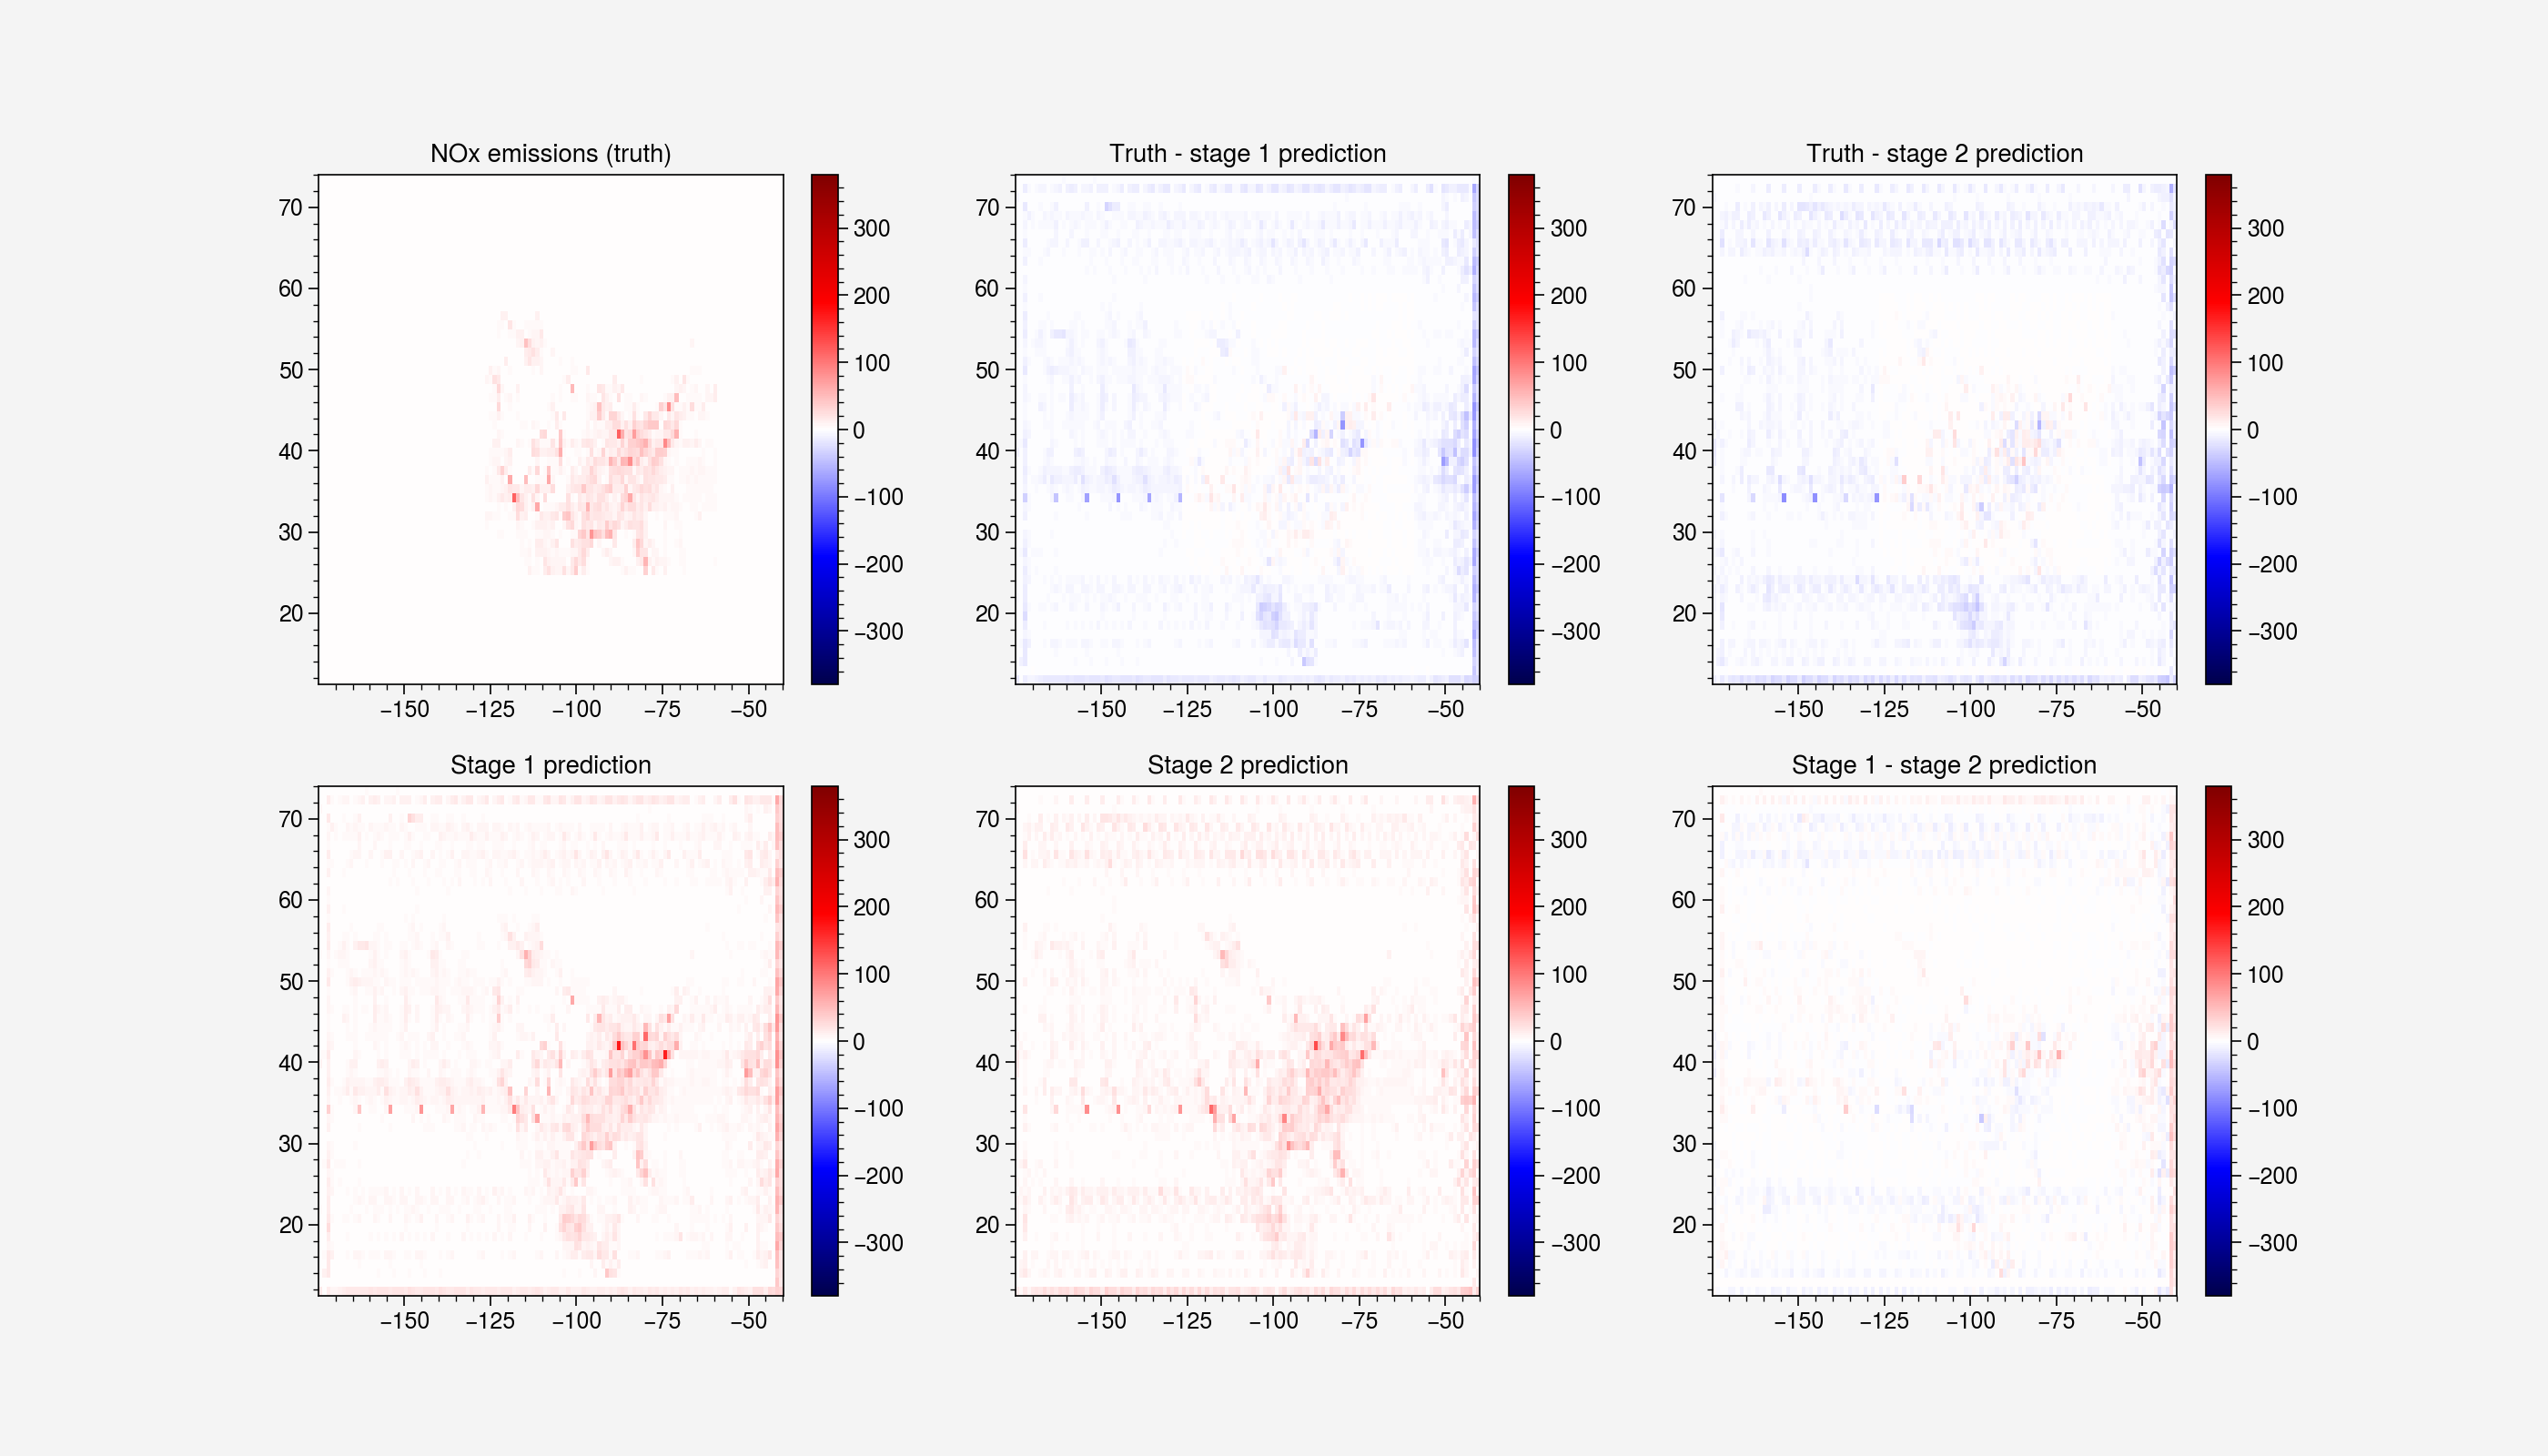

In [9]:
comp_maps = uplt.plot_stage_comp_maps(
        truth_params={'stage': 1, 'x_or_y': 'y', 'year': ex_year},
        pred_params={'stage': -1, 'HPC_run': ex_HPC_run, 'year': ex_year},
        this_date=ex_date)

We can also compare the truth to the stage 1 data in the following plot.

/Users/Grey/Documents/Research/Postdoc_Projects/unox/src/unox/plotting.py:310: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("jet").copy()
  my_cmap.set_under('w', 1)


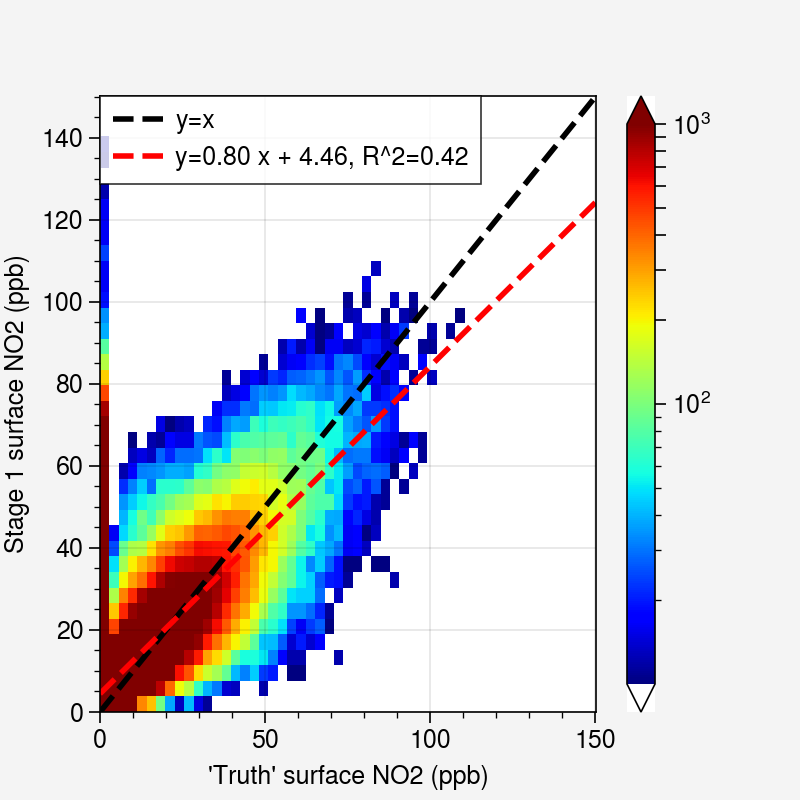

In [10]:
comp_plot = uplt.plot_comparison(
        truth_data={'stage':1, 'x_or_y':'y', 'year':ex_year},
        pred_data={'stage':1, 'HPC_run':ex_HPC_run, 'year':ex_year})

We can also restrict the domain of the data to use in these plots to match that of a dataset.

/Users/Grey/Documents/Research/Postdoc_Projects/unox/src/unox/plotting.py:310: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("jet").copy()
  my_cmap.set_under('w', 1)


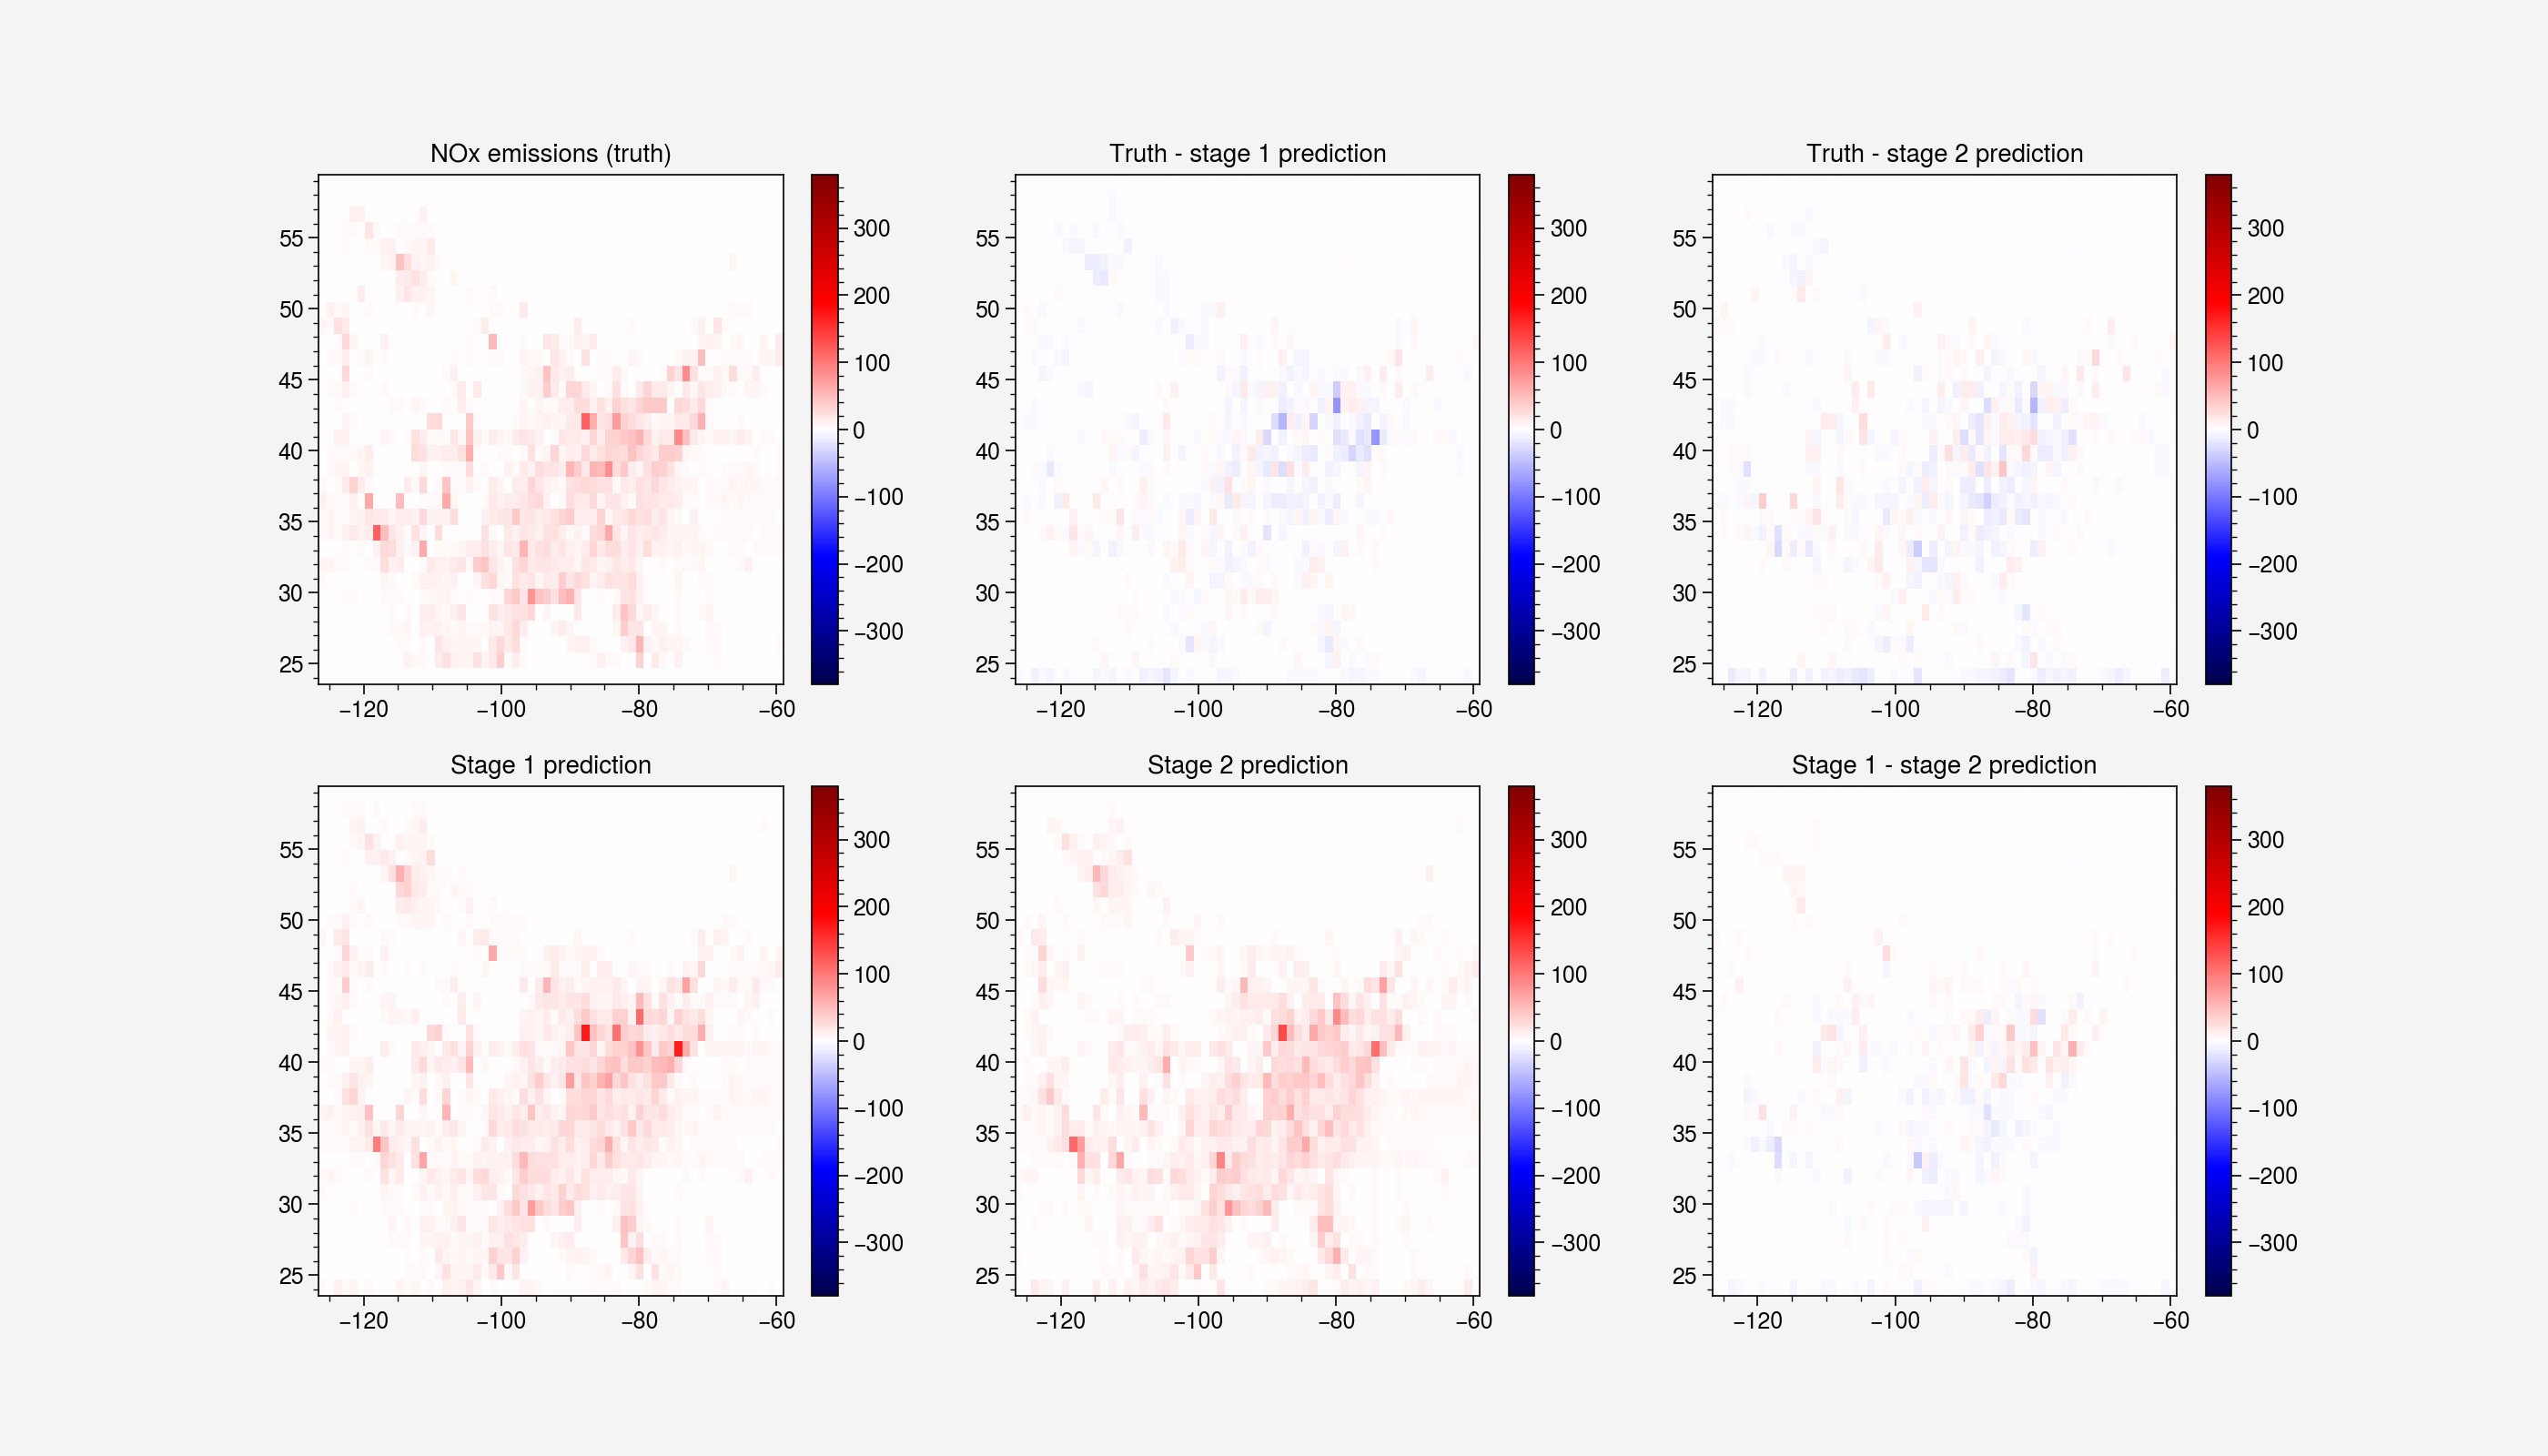

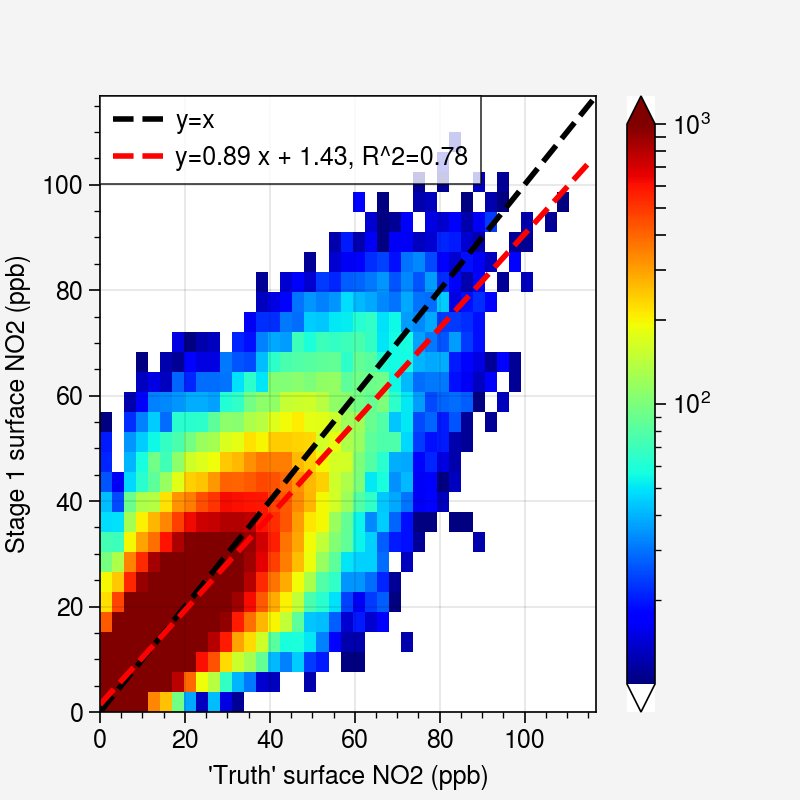

In [11]:
restrict_to_this = '../datafiles/nox_2019_t106_US.nc'

comp_maps = uplt.plot_stage_comp_maps(
        truth_params={'stage': 1, 'x_or_y': 'y', 'year': ex_year},
        pred_params={'stage': -1, 'HPC_run': ex_HPC_run, 'year': ex_year},
        this_date=ex_date,
        restrict_lat_lon_to=restrict_to_this)

comp_plot = uplt.plot_comparison(
        truth_data={'stage':1, 'x_or_y':'y', 'year':ex_year},
        pred_data={'stage':1, 'HPC_run':ex_HPC_run, 'year':ex_year},
        restrict_lat_lon_to=restrict_to_this)